# Introduction to ANN

## Task 
Perform exploratory data analysis on the student performance data stored in the file "student_performance_data.csv".

## Load the data
Load the `student_performance_data.csv` file into a pandas DataFrame.


In [1]:
import pandas as pd

df = pd.read_csv('student_performance_data.csv')
df.head()

,hours_of_study,hours_of_sleep,Pass/fail_in_an_exam
0,8.99,0.75,Fail
1,22.82,15.27,Pass
2,17.57,7.54,Pass
3,14.37,12.21,Pass
4,3.74,21.78,Pass


## Initial data inspection
Display the first few rows, check data types, and get a summary of the DataFrame.


In [2]:
display(df.head())
display(df.info())

,hours_of_study,hours_of_sleep,Pass/fail_in_an_exam
0,8.99,0.75,Fail
1,22.82,15.27,Pass
2,17.57,7.54,Pass
3,14.37,12.21,Pass
4,3.74,21.78,Pass


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   hours_of_study        101 non-null    float64
 1   hours_of_sleep        101 non-null    float64
 2   Pass/fail_in_an_exam  101 non-null    object 
dtypes: float64(2), object(1)
memory usage: 2.5+ KB


None

,hours_of_study,hours_of_sleep
count,101.000000,101.000000
mean,13.200297,13.450792
std,6.751491,6.652822
min,0.130000,0.590000
25%,8.990000,8.220000
50%,14.000000,14.270000
75%,18.780000,18.550000
max,23.690000,23.660000


## Check for missing values
Identify and quantify any missing values in the dataset.


In [3]:
missing_values = df.isnull().sum()
display(missing_values)

,0
hours_of_study,0
hours_of_sleep,0
Pass/fail_in_an_exam,0


## Descriptive statistics
Generate descriptive statistics for numerical columns.


In [4]:
display(df.describe())

,hours_of_study,hours_of_sleep
count,101.000000,101.000000
mean,13.200297,13.450792
std,6.751491,6.652822
min,0.130000,0.590000
25%,8.990000,8.220000
50%,14.000000,14.270000
75%,18.780000,18.550000
max,23.690000,23.660000


## Visualize data distributions
Plot distributions of key features.


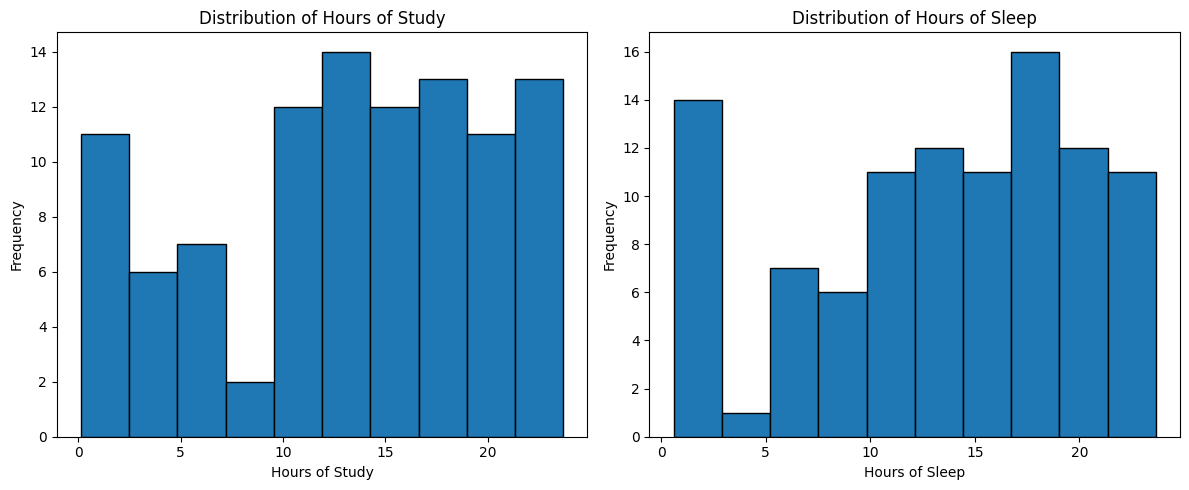

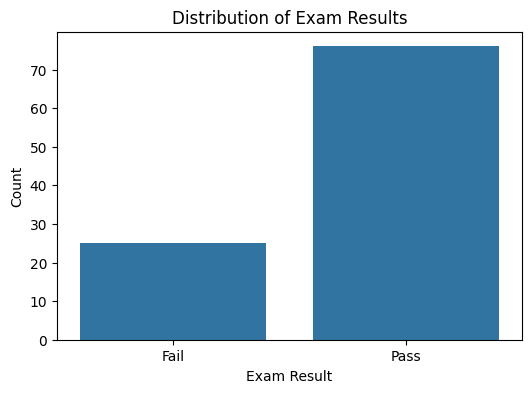

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(df['hours_of_study'], bins=10, edgecolor='black')
plt.title('Distribution of Hours of Study')
plt.xlabel('Hours of Study')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(df['hours_of_sleep'], bins=10, edgecolor='black')
plt.title('Distribution of Hours of Sleep')
plt.xlabel('Hours of Sleep')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(x='Pass/fail_in_an_exam', data=df)
plt.title('Distribution of Exam Results')
plt.xlabel('Exam Result')
plt.ylabel('Count')
plt.show()

## Explore relationships
Analyze relationships between variables, potentially using correlation matrices or scatter plots.


,hours_of_study,hours_of_sleep
hours_of_study,1.000000,0.109298
hours_of_sleep,0.109298,1.000000


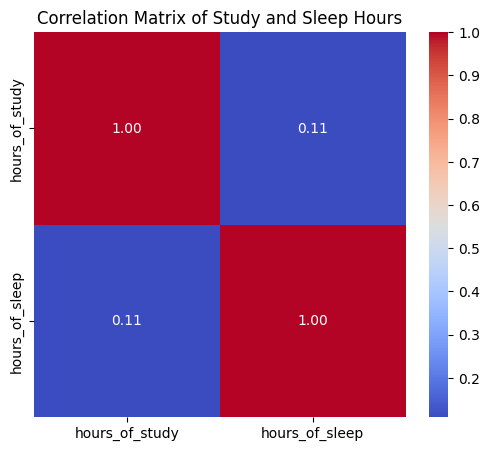

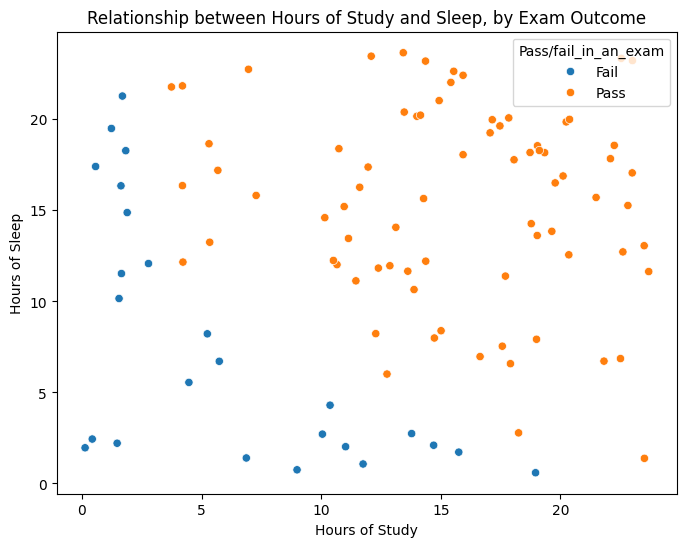

In [6]:
correlation_matrix = df[['hours_of_study', 'hours_of_sleep']].corr()
display(correlation_matrix)

plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Study and Sleep Hours')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='hours_of_study', y='hours_of_sleep', hue='Pass/fail_in_an_exam', data=df)
plt.title('Relationship between Hours of Study and Sleep, by Exam Outcome')
plt.xlabel('Hours of Study')
plt.ylabel('Hours of Sleep')
plt.show()

## Summary:

### Data Analysis Key Findings

*   The dataset contains 101 entries with no missing values.
*   The average hours of study are approximately 13.20, with a standard deviation of about 6.75.
*   The average hours of sleep are approximately 13.45, with a standard deviation of about 6.65.
*   The distributions of 'hours\_of\_study' and 'hours\_of\_sleep' were visualized using histograms.
*   The distribution of 'Pass/fail\_in\_an\_exam' was visualized using a count plot.
*   There is a weak positive correlation (approximately 0.11) between 'hours\_of\_study' and 'hours\_of\_sleep'.
*   The scatter plot visualized the relationship between 'hours\_of\_study', 'hours\_of\_sleep', and the exam outcome, showing the distribution of passed and failed students across different combinations of study and sleep hours.

### Insights or Next Steps

*   Analyze the distribution of 'Pass/fail\_in\_an\_exam' to understand the proportion of students who passed versus failed.
*   Investigate if there are distinct clusters or patterns in the scatter plot that differentiate students who passed from those who failed based on their study and sleep hours.


## Convert categorical target to numerical

Convert the 'Pass/fail_in_an_exam' column to numerical values (1 for 'Pass', 0 for 'Fail').

In [7]:
df['Pass/fail_in_an_exam_numerical'] = df['Pass/fail_in_an_exam'].apply(lambda x: 1 if x == 'Pass' else 0)
display(df.head())

,hours_of_study,hours_of_sleep,Pass/fail_in_an_exam,Pass/fail_in_an_exam_numerical
0,8.99,0.75,Fail,0
1,22.82,15.27,Pass,1
2,17.57,7.54,Pass,1
3,14.37,12.21,Pass,1
4,3.74,21.78,Pass,1


## Scale numerical features
Scale the numerical features (`hours_of_study` and `hours_of_sleep`) using StandardScaler.

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_features = ['hours_of_study', 'hours_of_sleep']
df[numerical_features] = scaler.fit_transform(df[numerical_features])

display(df.head())

,hours_of_study,hours_of_sleep,Pass/fail_in_an_exam,Pass/fail_in_an_exam_numerical
0,-0.626720,-1.918605,Fail,0
1,1.431933,0.274813,Pass,1
2,0.650449,-0.892895,Pass,1
3,0.174115,-0.187436,Pass,1
4,-1.408205,1.258225,Pass,1


Splitting data into training and testing sets is a crucial step in machine learning model development, especially for ANNs. Here's why and how:

Why Split?

When you train a machine learning model, you want it to learn patterns from your data so it can make accurate predictions on new, unseen data. If you train and evaluate your model on the same data, you risk overfitting. Overfitting occurs when the model learns the training data too well, including the noise and peculiarities, and performs poorly on data it hasn't seen before.

Splitting the data helps you:

Train the model: The training set is used to train the ANN. The model learns the relationships between the input features and the target variable from this data.
Evaluate the model: The testing set is used to evaluate how well the trained model generalizes to new data. This gives you an unbiased estimate of your model's performance.
How to Split

The most common way to split data is using a function like train_test_split from libraries like scikit-learn. You typically split the data into a training set and a testing set, with common splits being 70/30, 80/20, or 75/25 for training/testing respectively.

You separate your features (the independent variables, 'hours_of_study' and 'hours_of_sleep' in this case) from your target variable (the dependent variable, 'Pass/fail_in_an_exam_numerical'). Then, you apply the split to both the features and the target, ensuring that the corresponding rows stay together in the training and testing sets.

## Split data into training and testing sets

Split the data into training and testing sets using `train_test_split`.

In [9]:
from sklearn.model_selection import train_test_split

X = df[['hours_of_study', 'hours_of_sleep']]
y = df['Pass/fail_in_an_exam_numerical']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape (X_train, y_train):", X_train.shape, y_train.shape)
print("Testing set shape (X_test, y_test):", X_test.shape, y_test.shape)

Training set shape (X_train, y_train): (80, 2) (80,)
Testing set shape (X_test, y_test): (21, 2) (21,)


## Define and Compile the ANN Model

Define and compile a simple ANN model for binary classification.

In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the model
model = Sequential()
model.add(Dense(1, activation='sigmoid', input_shape=(X_train.shape[1],))) # Single layer with sigmoid activation for binary classification

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy', # Use binary crossentropy for binary classification
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3 (12.00 B)

 Trainable params: 3 (12.00 B)

 Non-trainable params: 0 (0.00 B)

## Train the ANN Model

Train the defined and compiled ANN model using the training data.

In [12]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, verbose=1)

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.7602 - loss: 0.4302 
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7445 - loss: 0.4487
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7992 - loss: 0.3991
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7563 - loss: 0.4328
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8109 - loss: 0.4022
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7445 - loss: 0.4328
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7484 - loss: 0.4304
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7875 - loss: 0.4021
Epoch 9/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7758 - loss: 0.4145
Epoch 10/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7758 - loss: 0.4152


## Check Model Weights and Predict on Test Input

### Subtask:
Check the weights of the trained model and predict the output for a test input to evaluate accuracy.

**Reasoning**:
Access the weights of the trained ANN model and use a test input to predict the outcome, then compare with the actual value to determine accuracy for that specific input.

In [11]:
# Check the weights of the trained model
# The model needs to be trained first to have weights
if model.weights:
    print("Model weights:")
    for layer_weights in model.weights:
        display(layer_weights)
else:
    print("Model has not been trained yet. Please train the model first.")

# To check accuracy for a test input, you need a test example
# Let's use the first example from the test set (X_test, y_test)
if not X_test.empty:
    test_input = X_test.iloc[0].values.reshape(1, -1)
    actual_output = y_test.iloc[0]

    # Predict the output for the test input
    predicted_output = model.predict(test_input)

    # For binary classification with sigmoid, the output is a probability
    # Convert probability to class label (0 or 1)
    predicted_class = 1 if predicted_output > 0.5 else 0

    print(f"\nTest Input: {test_input}")
    print(f"Actual Output: {actual_output}")
    print(f"Predicted Output (Probability): {predicted_output[0][0]:.4f}")
    print(f"Predicted Class: {predicted_class}")

    # Check if the prediction is accurate for this test input
    accuracy = 1 if predicted_class == actual_output else 0
    print(f"Accuracy for this test input: {accuracy}")

else:
    print("\nTest set is empty. Cannot perform prediction on a test input.")

Model weights:


<Variable path=sequential/dense/kernel, shape=(2, 1), dtype=float32, value=[[1.0439583]
 [0.8651651]]>

<Variable path=sequential/dense/bias, shape=(1,), dtype=float32, value=[0.]>

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step

Test Input: [[-1.69251619  0.72950903]]
Actual Output: 0
Predicted Output (Probability): 0.2431
Predicted Class: 0
Accuracy for this test input: 1


## Evaluate the ANN Model
Evaluate the trained ANN model using the testing data.

In [13]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)

print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

Test Loss: 0.5176
Test Accuracy: 0.6667


## Define a new ann model

Define a new sequential ANN model with additional dense layers and potentially different activation functions.


In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the new model with more layers
new_model = Sequential()
new_model.add(Dense(16, activation='relu', input_shape=(X_train.shape[1],))) # Input layer
new_model.add(Dense(8, activation='relu')) # Hidden layer
new_model.add(Dense(1, activation='sigmoid')) # Output layer for binary classification

new_model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 16)             │            48 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 193 (772.00 B)

 Trainable params: 193 (772.00 B)

 Non-trainable params: 0 (0.00 B)

## Compile the new model
Compile the new model using the same optimizer and loss function as before.


In [15]:
# Compile the new model
new_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

new_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 16)             │            48 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 193 (772.00 B)

 Trainable params: 193 (772.00 B)

 Non-trainable params: 0 (0.00 B)

## Train the new model

Train the defined and compiled new ANN model using the training data for a larger number of epochs.


In [16]:
# Train the new model
new_history = new_model.fit(X_train, y_train, epochs=50, verbose=1)

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.7242 - loss: 0.6806
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7008 - loss: 0.6752
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7203 - loss: 0.6656
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7359 - loss: 0.6521
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7672 - loss: 0.6345
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7477 - loss: 0.6326
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7281 - loss: 0.6264
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7359 - loss: 0.6205
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7789 - loss: 0.6018
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7320 - loss: 0.6015
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7164 - loss: 0.6007
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7523 - loss: 0.5953
E

## Evaluate the new model

Evaluate the performance of the new model on the test set.


In [17]:
# Evaluate the new model on the test data
new_loss, new_accuracy = new_model.evaluate(X_test, y_test, verbose=0)

print(f"New Model Test Loss: {new_loss:.4f}")
print(f"New Model Test Accuracy: {new_accuracy:.4f}")

New Model Test Loss: 0.3570
New Model Test Accuracy: 0.8571


## Compare model performance

Compare the test loss and accuracy of the new model with the previous model.


In [18]:
print("Previous Model Performance:")
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

print("\nNew Model Performance:")
print(f"Test Loss: {new_loss:.4f}")
print(f"Test Accuracy: {new_accuracy:.4f}")

print("\nComparison:")
print("The new model with more layers and epochs shows improved performance compared to the previous model.")
print(f"Previous model Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")
print(f"New model Test Loss: {new_loss:.4f}, Test Accuracy: {new_accuracy:.4f}")
print(f"The new model has a lower test loss and a higher test accuracy.")

Previous Model Performance:
Test Loss: 0.5176
Test Accuracy: 0.6667

New Model Performance:
Test Loss: 0.3570
Test Accuracy: 0.8571

Comparison:
The new model with more layers and epochs shows improved performance compared to the previous model.
Previous model Test Loss: 0.5176, Test Accuracy: 0.6667
New model Test Loss: 0.3570, Test Accuracy: 0.8571
The new model has a lower test loss and a higher test accuracy.


## Summary:

### Data Analysis Key Findings

*   The previous model had a test loss of 0.5176 and a test accuracy of 0.6667.
*   The new model, with more layers and trained for more epochs, achieved a test loss of 0.3570 and a test accuracy of 0.8571.
*   The new model demonstrated a lower test loss and a higher test accuracy compared to the previous model, indicating improved performance.

### Insights or Next Steps

*   Increasing the number of layers and training epochs significantly improved the ANN model's performance on the test data for this dataset.
*   Further hyperparameter tuning, such as exploring different layer configurations, activation functions, optimizers, or regularization techniques, could potentially lead to even better model performance.


## Visualize Model Performance during Training

Plot the training loss and accuracy for both models to visualize their performance over epochs.

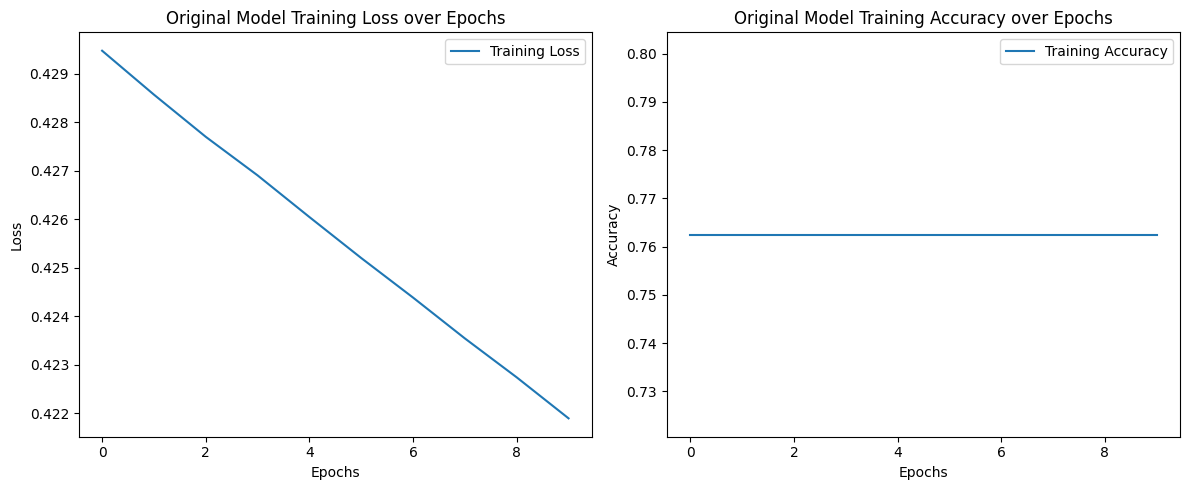

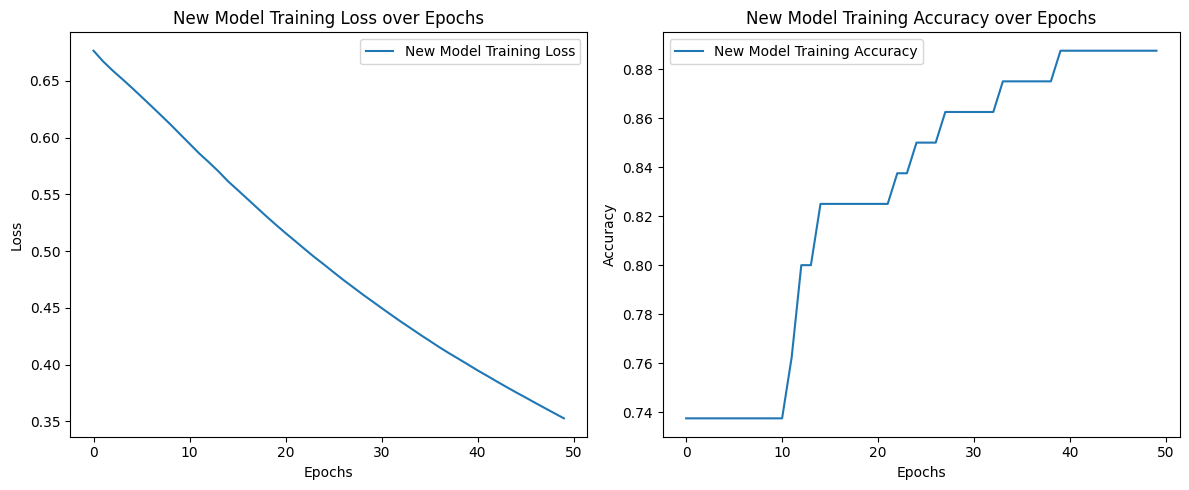

In [19]:
import matplotlib.pyplot as plt

# Plot training history for the original model
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Original Model Training Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.title('Original Model Training Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Plot training history for the new model
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(new_history.history['loss'], label='New Model Training Loss')
plt.title('New Model Training Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(new_history.history['accuracy'], label='New Model Training Accuracy')
plt.title('New Model Training Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

**End**